# 互评作业1: 数据探索性分析与预处理

## 对性别的分析

In [ ]:
%%time
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import os
from collections import defaultdict
from pathlib import Path

data_type = "10G"
data_dir = Path(f"./data/{data_type}_data/")
file_paths = [file for file in data_dir.glob("*.parquet")]

gender_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        
        chunk_counts = df['gender'].value_counts(dropna=False)
        for gender, count in chunk_counts.items():
            gender_counts[gender] += count

result_df = pd.DataFrame(list(gender_counts.items()), columns=['gender', 'count'])
result_df = result_df.sort_values(by='count', ascending=False)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 33.2 s
Wall time: 22.5 s


,gender,count
0,男,4813444
1,女,4786220
2,未指定,201172
3,其他,199164


绘制饼状图

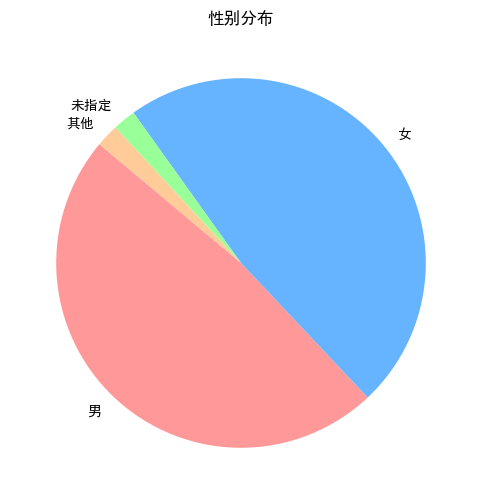

CPU times: total: 93.8 ms
Wall time: 69.8 ms


In [26]:
%%time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

labels = result_df['gender']
sizes = result_df['count'].values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('性别分布')

plt.show()

In [17]:
%%time
total_count = result_df['count'].sum()
error_value = result_df[result_df['gender'].isin(['未指定', '其他'])]['count'].sum()
print(f"总记录数: {total_count}")
print(f"性别异常值: {error_value}")
print(f"异常值占比: {(error_value/total_count*100):.2f}%")

总记录数: 10000000
性别异常值: 400336
异常值占比: 4.00%
CPU times: total: 15.6 ms
Wall time: 2.07 ms


认为性别为“男”和“女”，为正常值，“未指定”和“其他”均为异常值

## 对国家的分析

In [27]:
%%time
country_counts = defaultdict(int)

for file_path in file_paths:
    parquet_file = pq.ParquetFile(file_path)
    
    # 分块读取文件
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        
        chunk_counts = df['country'].value_counts(dropna=False)
        for country, count in chunk_counts.items():
            country_counts[country] += count

result_df = pd.DataFrame(list(country_counts.items()), columns=['country', 'count'])
result_df = result_df.sort_values(by='count', ascending=False)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 32.8 s
Wall time: 22.8 s


,country,count
0,中国,1021076
1,日本,1002314
2,澳大利亚,1001089
3,美国,1001051
4,印度,999861
5,德国,998599
6,法国,998061
7,英国,995944
8,俄罗斯,993215
9,巴西,988790


绘制柱状图

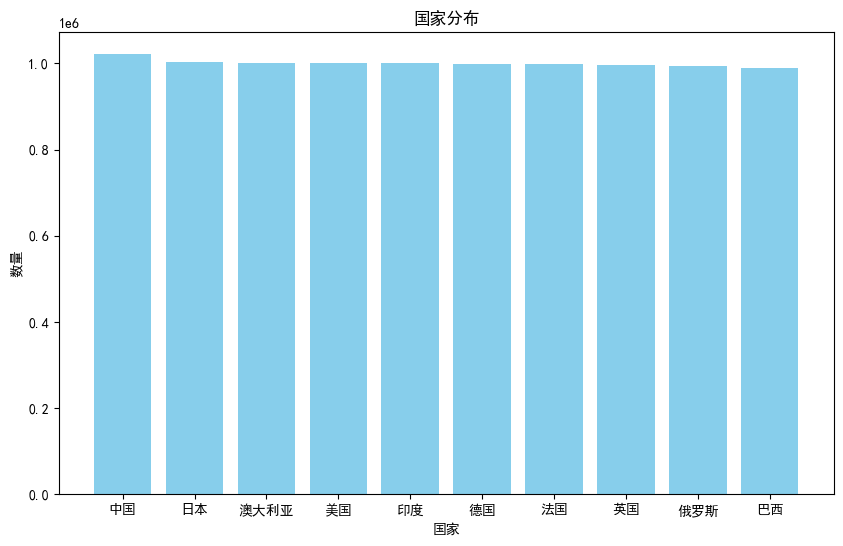

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.bar(result_df['country'], result_df['count'], color='skyblue')
plt.xlabel('国家')
plt.ylabel('数量')
plt.title('国家分布')
plt.show()

## 对年龄的分析

In [30]:
%%time
age_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        chunk_counts = df['age'].value_counts(dropna=False)
        for age, count in chunk_counts.items():
            age_counts[age] += count

result_df = pd.DataFrame(list(age_counts.items()), columns=['age', 'count'])
result_df = result_df.sort_values(by='age', ascending=True)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 32.8 s
Wall time: 22.7 s


,age,count
0,18,119967
1,19,120303
2,20,120939
3,21,120840
4,22,119984
...,...,...
78,96,120917
79,97,121100
80,98,120079
81,99,119577


绘制折线图

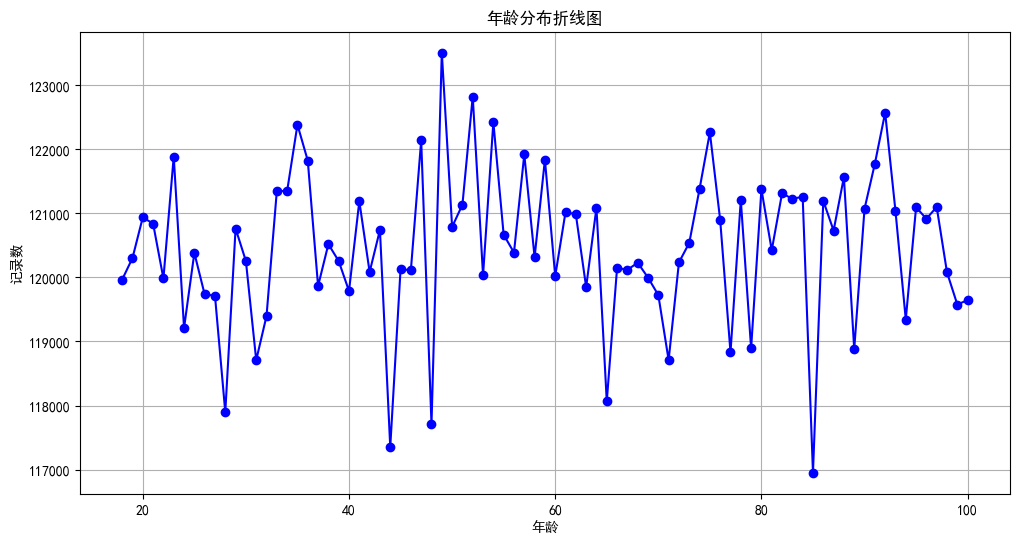

CPU times: total: 188 ms
Wall time: 189 ms


In [31]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df['age'], result_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('年龄')
plt.ylabel('记录数')
plt.title('年龄分布折线图')
plt.grid(True)

plt.show()

## 对收入的分析

In [33]:
%%time
income_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        chunk_counts = df['income'].value_counts(dropna=False)
        for income, count in chunk_counts.items():
            income_counts[income] += count

result_df = pd.DataFrame(list(income_counts.items()), columns=['income', 'count'])
result_df = result_df.sort_values(by='income', ascending=True)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 33.2 s
Wall time: 23.2 s


,income,count
0,0.0,9697
1,1000.0,9787
2,2000.0,10037
3,3000.0,9913
4,4000.0,10365
...,...,...
996,996000.0,10177
997,997000.0,10050
998,998000.0,10048
999,999000.0,9602


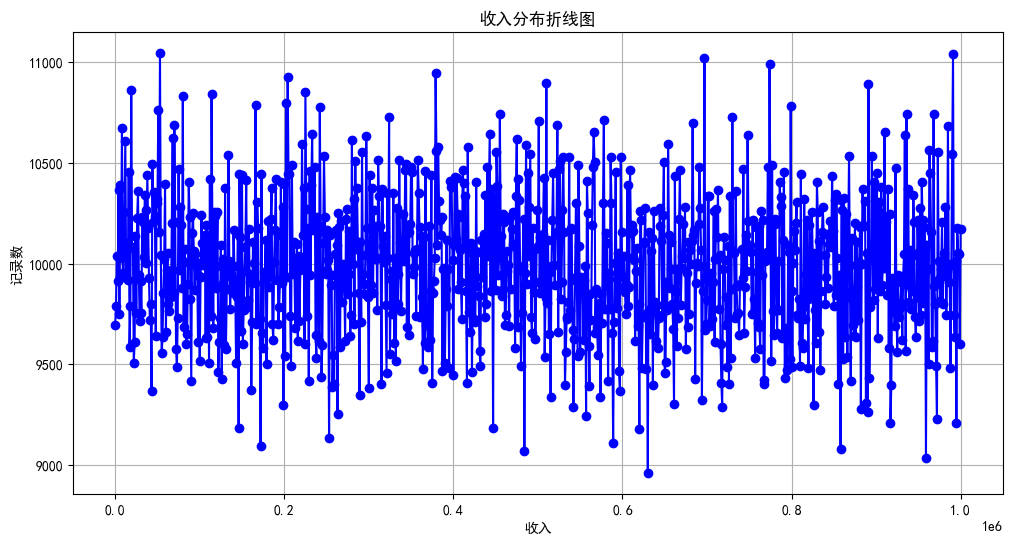

In [ ]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df['income'], result_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('收入')
plt.ylabel('记录数')
plt.title('收入分布折线图')
plt.grid(True)

plt.show()

## 对信用分的分析

In [37]:
%%time
credit_score_counts = defaultdict(int)

for file_path in file_paths:
    # 分块读取文件
    parquet_file = pq.ParquetFile(file_path)
    print(parquet_file)
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        chunk_counts = df['credit_score'].value_counts(dropna=False)
        for credit_score, count in chunk_counts.items():
            credit_score_counts[credit_score] += count

result_df = pd.DataFrame(list(credit_score_counts.items()), columns=['credit_score', 'count'])
result_df = result_df.sort_values(by='credit_score', ascending=True)
result_df = result_df.reset_index(drop=True)

result_df

CPU times: total: 32.5 s
Wall time: 22.1 s


,credit_score,count
0,300,17287
1,301,18212
2,302,17783
3,303,18750
4,304,18671
...,...,...
546,846,18137
547,847,17616
548,848,17762
549,849,18170


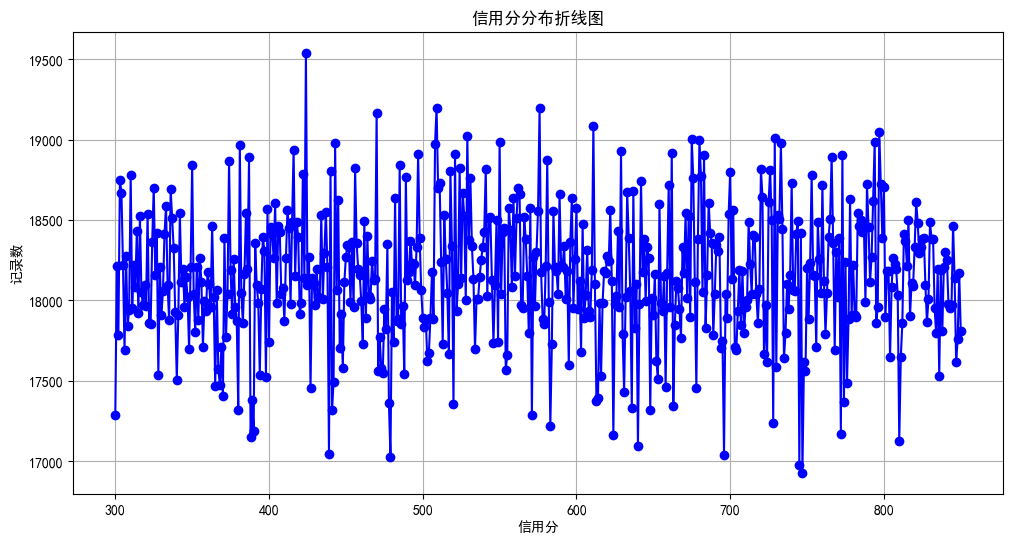

CPU times: total: 234 ms
Wall time: 230 ms


In [38]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df['credit_score'], result_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('信用分')
plt.ylabel('记录数')
plt.title('信用分分布折线图')
plt.grid(True)

plt.show()

## 识别潜在高价值用户

In [ ]:
%%time
import glob

for index, file_path in enumerate(file_paths):
    parquet_file = pq.ParquetFile(file_path)
    print(parquet_file)
    
    for i in range(parquet_file.num_row_groups):
        table = parquet_file.read_row_group(i)
        df = table.to_pandas()
        conditions = (
            (df['age'].between(20, 35)) &
            (df['income'] > 50000) &
            (df['credit_score'] > 600)
        )
        df['is_high_value_user'] = conditions.astype(int)
        temp_file_path = f"part-{index}-temp_chunk_{i}.parquet"
        df.to_parquet(temp_file_path)
    
    temp_files = glob.glob(f"part-{index}-temp_chunk_*.parquet")
    merged_df = pd.concat([pd.read_parquet(file) for file in temp_files], ignore_index=True)
    save_path = f"result/{data_type}_data/part-0000{index}.parquet"
    merged_df.to_parquet(save_path)
    merged_df.head()
    # 删除临时文件
    for file in temp_files:
        os.remove(file)


CPU times: total: 2min 5s
Wall time: 1min 45s
